In [0]:
import tensorflow as tf
import numpy as np
import os

In [0]:
!mkdir "trash-data"

In [0]:
!wget --no-check-certificate \
  https://c7.alamy.com/comp/BY9H2A/a-bottle-of-red-wine-in-a-spanish-holiday-hotel-with-compliments-of-BY9H2A.jpg \
  -O haha.jpg

--2019-10-27 11:57:51--  https://c7.alamy.com/comp/BY9H2A/a-bottle-of-red-wine-in-a-spanish-holiday-hotel-with-compliments-of-BY9H2A.jpg
Resolving c7.alamy.com (c7.alamy.com)... 99.84.254.73, 99.84.254.110, 99.84.254.126, ...
Connecting to c7.alamy.com (c7.alamy.com)|99.84.254.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘haha.jpg’

haha.jpg                [ <=>                ]  77.04K  --.-KB/s    in 0.1s    

Last-modified header invalid -- time-stamp ignored.
2019-10-27 11:57:52 (728 KB/s) - ‘haha.jpg’ saved [78893]



In [0]:
!wget --no-check-certificate \
  https://github.com/garythung/trashnet/raw/master/data/dataset-resized.zip \
  -O trash-data/dataset-resized.zip

--2019-10-27 07:24:46--  https://github.com/garythung/trashnet/raw/master/data/dataset-resized.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/garythung/trashnet/master/data/dataset-resized.zip [following]
--2019-10-27 07:24:47--  https://raw.githubusercontent.com/garythung/trashnet/master/data/dataset-resized.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42834870 (41M) [application/zip]
Saving to: ‘trash-data/dataset-resized.zip’

trash-data/dataset- 100%[===================>]  40.85M   129MB/s    in 0.3s    

2019-10-27 07:24:48 (129 MB/s) - ‘trash-data/dataset-resized.zip’ saved [4283487

In [0]:
import os
import zipfile

local_zip = 'trash-data/dataset-resized.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('trash-data')
zip_ref.close()

In [0]:
path = 'trash-data/train'
path2 = 'trash-data/validation'

if not os.path.isfile(path):
  os.mkdir(path)
  
if not os.path.isfile(path2):
  os.mkdir(path2)

In [0]:
for i in range(6):
  os.mkdir(os.path.join(path,str(i)))
  

In [0]:
for i in range(6):
  os.mkdir(os.path.join(path2,str(i)))

In [0]:
import shutil

data_path = 'trash-data/dataset-resized'
dst_path = 'trash-data/validation'
dst_path_trn = 'trash-data/train'
dirs = os.listdir(data_path)

x=0
for i in dirs:
  p = os.path.join(data_path, i)
  for subdir, dirs, files in os.walk(p):
    length = len(files)
    amt_val = round(0.2 * length)
    val = files[0:amt_val]
    trn = files[amt_val:]
    for paths in val:
      PATH = os.path.join(p, paths)
      dst = os.path.join(dst_path, str(x))
      shutil.copy(PATH,dst)
    for paths in trn:
      PATH = os.path.join(p, paths)
      dst = os.path.join(dst_path_trn, str(x))
      shutil.copy(PATH,dst)
    x+=1

In [0]:
def create_model():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.BatchNormalization(input_shape=train_set.shape[1:]))
  model.add(tf.keras.layers.Conv2D(64, (5, 5), padding='same', activation='elu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.BatchNormalization(input_shape=train_set.shape[1:]))
  model.add(tf.keras.layers.Conv2D(128, (5, 5), padding='same', activation='elu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.BatchNormalization(input_shape=train_set.shape[1:]))
  model.add(tf.keras.layers.Conv2D(256, (5, 5), padding='same', activation='elu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(256))
  model.add(tf.keras.layers.Activation('elu'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(10))
  model.add(tf.keras.layers.Activation('softmax'))
  return model

In [0]:
import cv2
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

data_path = 'trash-data/dataset-resized'
dirs = os.listdir(data_path)

valid_ = []
train_ = []


for i in dirs:
  p = os.path.join(data_path, i)
  for subdir, dirs, files in os.walk(p):
    length = len(files)
    amt_val = round(0.2*length)
    val = files[0:amt_val]
    trn = files[amt_val:]
    for paths in val:
      PATH = os.path.join(p,paths)
      img = cv2.imread(PATH,0)
      resized = cv2.resize(img, (28,28), interpolation=cv2.INTER_NEAREST)
      reshaped = resized.reshape(28,28,1)
      valid_.append(reshaped)
    for paths in trn:
      PATH = os.path.join(p,paths)
      img = cv2.imread(PATH,0)
      resized = cv2.resize(img, (28,28), interpolation=cv2.INTER_NEAREST)
      reshaped = resized.reshape(28,28,1)
      train_.append(reshaped)

train_set = np.asarray(train_)
valid_set = np.asarray(valid_)

In [0]:
from PIL import Image

type(train_set)

numpy.ndarray

In [0]:
x=0

dirs = os.listdir(data_path)


train_label = []
valid_label = []
for i in dirs:
  p = os.path.join(data_path, i)
  for subdir, dirs, files in os.walk(p):
    length = len(files)
    amt_val = round(0.2 * length)
    val = files[0:amt_val]
    trn = files[amt_val:]
    for paths in val:
      valid_label.append(x)
    for paths in trn:
      train_label.append(x)
    x+=1

train_label = np.asarray(trhttps://www.google.com/search?client=ubuntu&channel=fs&q=displaying+1dimensional+image+python&ie=utf-8&oe=utf-8ain_label)
valid_label = np.asarray(valid_label)

In [0]:
print(train_label.shape)

(2022,)


In [0]:
import os


model = create_model()
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.003, ),
    loss='sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy'])

model.fit(
    train_set.astype(np.float32), train_label.astype(np.float32),
    epochs=10,
    batch_size=50,
    validation_data=(valid_set.astype(np.float32), valid_label.astype(np.float32)),
    validation_freq=3
)

model.save_weights('./trash_sorter.h5', overwrite=True)

Train on 2022 samples, validate on 505 samples
Epoch 1/10
2022/2022 [==============================] - 14s 7ms/sample - loss: 4.3611 - sparse_categorical_accuracy: 0.2809
Epoch 2/10
2022/2022 [==============================] - 14s 7ms/sample - loss: 1.9733 - sparse_categorical_accuracy: 0.3215
Epoch 3/10
2022/2022 [==============================] - 16s 8ms/sample - loss: 1.8603 - sparse_categorical_accuracy: 0.3408 - val_loss: 3.8807 - val_sparse_categorical_accuracy: 0.2752
Epoch 4/10
2022/2022 [==============================] - 14s 7ms/sample - loss: 1.7694 - sparse_categorical_accuracy: 0.3630
Epoch 5/10
2022/2022 [==============================] - 14s 7ms/sample - loss: 1.7055 - sparse_categorical_accuracy: 0.3724
Epoch 6/10
2022/2022 [==============================] - 15s 7ms/sample - loss: 1.6293 - sparse_categorical_accuracy: 0.4065 - val_loss: 1.7828 - val_sparse_categorical_accuracy: 0.4040
Epoch 7/10
2022/2022 [==============================] - 14s 7ms/sample - loss: 1.6343 -

In [0]:
trash_sorter = create_model()
trash_sorter.load_weights('./trash_sorter.h5')

preds = trash_sorter.predict(valid_set)


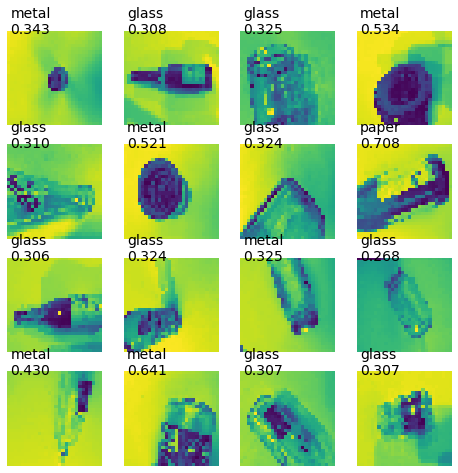

In [0]:
LABEL_NAMES = ['glass','cardboard', 'paper', 'trash', 'metal', 'plastic']


from matplotlib import pyplot
%matplotlib inline

def plot_predictions(images, predictions):
  n = images.shape[0]
  nc = int(np.ceil(n / 4))
  f, axes = pyplot.subplots(nc, 4)
  for i in range(nc * 4):
    y = i // 4
    x = i % 4
    axes[x, y].axis('off')
    
    label = LABEL_NAMES[np.argmax(predictions[i])]
    confidence = np.max(predictions[i])
    if i > n:
      continue
    axes[x, y].imshow(images[i])
    axes[x, y].text(0.5, 0.5, label + '\n%.3f' % confidence, fontsize=14)

  pyplot.gcf().set_size_inches(8, 8)  

plot_predictions(np.squeeze(valid_set[:16]), 
                 trash_sorter.predict(valid_set[:16]))

In [0]:
haha = cv2.imread('/content/haha.jpg',0)
haha = cv2.resize(haha, (28,28), interpolation=cv2.INTER_NEAREST)
hahaimg = Image.fromarray(haha)
display(hahaimg)
hahaha = np.array([haha])
hahaha = hahaha.reshape(1,28,28,1)

In [0]:
pr = trash_sorter.predict(hahaha)

In [0]:
lab = LABEL_NAMES[np.argmax(pr)]
confidence = np.max(pr)
print(confidence, lab)

0.35993212 metal
